In [13]:
# Want to do some map plotting :)

import pandas as pd
import reverse_geocoder as rg
from pathlib import Path
import geopandas
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import numpy as np

df_path = Path(r'Data\2LCountryCodes_post2018.csv')
df_path

WindowsPath('Data/2LCountryCodes_post2018.csv')

In [37]:
venues_df = pd.read_csv(df_path)
venues_df.shape

(6905, 13)

Now let's get the country codes and their respective continents


In [43]:
response = requests.get('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv')

file_object = io.StringIO(response.content.decode('utf-8'))

country_codes_df = pd.read_csv(file_object)
country_codes_df = country_codes_df.iloc[:,0:5]

# We have an issue: duplicate countries in different continents?? Let's drop these bad boys
country_codes_df[country_codes_df.Two_Letter_Country_Code == 'AZ']

Continent_Name Continent_Code             Country_Name  \
8         Europe             EU  Azerbaijan, Republic of   
9           Asia             AS  Azerbaijan, Republic of   

  Two_Letter_Country_Code Three_Letter_Country_Code  
8                      AZ                       AZE  
9                      AZ                       AZE

In [44]:
# Get rid of duplicates
country_codes_df = country_codes_df.drop_duplicates('Two_Letter_Country_Code')

In [45]:
# merge this into our original df
venues_df = venues_df.merge(country_codes_df, right_on='Two_Letter_Country_Code', left_on='Country', how='left')
venues_df.drop(['Two_Letter_Country_Code'], axis = 1)

Unnamed: 0        Lat       Long Venue_Type  \
0              0  10.377644 -75.496582       food   
1              1  40.647499  22.920163    default   
2              2  42.000524  12.564636       food   
3              3 -23.558042 -46.660100   shopping   
4              4  45.539970  13.734852   shopping   
...          ...        ...        ...        ...   
6900        6900  46.032223  14.459006     sports   
6901        6901  46.024666  14.531146       cafe   
6902        6902  46.251793  15.165194   shopping   
6903        6903  46.560155  15.649150   shopping   
6904        6904  41.639629  -0.875237   shopping   

                                        Venue_Name  Created_On_Epoch  \
0                                    QUESOS NENECO        1564682328   
1     Ταπετσαρίες αυτοκινήτων - ΚΑΡΑΜΠΕΡΗΣ ΧΡΗΣΤΟΣ        1530718484   
2                       AZIENDA AGRICOLA FORTUNATO        1551976752   
3                                         KriptoBR        1534775809   
4                               Buzz, Planet Koper        1574094032   
...                                            ...               ...   
6900                               Tenis Schweiger        1589897799   
6901                               Kavarnica Green        1589898116   
6902                Kreativna Fabrika online store        1589898486   
6903       dernier | Final difference online store        1589898698   
6904                                  Pegatinas Pi        1589985862   

      Created_On    Quarter  Year  Month                             latlong  \
0       8/1/2019  Quarter 3  2019      8         (10.37764401, -75.49658239)   
1       7/4/2018  Quarter 3  2018      7          (40.64749893, 22.92016268)   
2       3/7/2019  Quarter 1  2019      3          (42.00052447, 12.56463647)   
3      8/20/2018  Quarter 3  2018      8        (-23.55804222, -46.66009963)   
4     11/18/2019  Quarter 4  2019     11          (45.53996976, 13.73485208)   
...          ...        ...   ...    ...                                 ...   
6900   5/19/2020  Quarter 2  2020      5          (46.03222305, 14.45900559)   
6901   5/19/2020  Quarter 2  2020      5          (46.02466599, 14.53114629)   
6902   5/19/2020  Quarter 2  2020      5          (46.25179255, 15.16519368)   
6903   5/19/2020  Quarter 2  2020      5          (46.56015499, 15.64915001)   
6904   5/20/2020  Quarter 2  2020      5  (41.63962937, -0.8752369881000001)   

     Country           City Continent_Name Continent_Code  \
0         CO      Cartagena  South America             SA   
1         GR    Ampelokipoi         Europe             EU   
2         IT     Tor Lupara         Europe             EU   
3         BR      Sao Paulo  South America             SA   
4         SI          Koper         Europe             EU   
...      ...            ...            ...            ...   
6900      SI  Vnanje Gorice         Europe             EU   
6901      SI        Lavrica         Europe             EU   
6902      SI          Zalec         Europe             EU   
6903      SI        Maribor         Europe             EU   
6904      ES       Zaragoza         Europe             EU   

                        Country_Name Three_Letter_Country_Code  
0              Colombia, Republic of                       COL  
1          Greece, Hellenic Republic                       GRC  
2            Italy, Italian Republic                       ITA  
3     Brazil, Federative Republic of                       BRA  
4              Slovenia, Republic of                       SVN  
...                              ...                       ...  
6900           Slovenia, Republic of                       SVN  
6901           Slovenia, Republic of                       SVN  
6902           Slovenia, Republic of                       SVN  
6903           Slovenia, Republic of                       SVN  
6904               Spain, Kingdom of                       ESP  

[6905 rows x 17 columns]

In [119]:
# venues_df.resample('M', on='Created_On').sum()
venues_df['M-Y'] = pd.to_datetime(venues_df[['Year', 'Month']].assign(DAY=1)).dt.date
venues_df['M-Y']

0       2019-08-01
1       2018-07-01
2       2019-03-01
3       2018-08-01
4       2019-11-01
           ...    
6900    2020-05-01
6901    2020-05-01
6902    2020-05-01
6903    2020-05-01
6904    2020-05-01
Name: M-Y, Length: 6905, dtype: object

In [120]:
month_data = venues_df['M-Y'].value_counts()
month_data

2020-03-01    756
2018-11-01    575
2018-01-01    475
2018-05-01    308
2018-02-01    301
2018-07-01    278
2018-03-01    267
2018-09-01    253
2019-04-01    252
2018-04-01    247
2019-01-01    247
2019-05-01    244
2019-08-01    236
2018-10-01    234
2019-11-01    233
2018-06-01    192
2019-09-01    189
2018-12-01    178
2018-08-01    172
2019-07-01    171
2019-06-01    168
2019-02-01    164
2019-03-01    156
2019-10-01    139
2020-02-01    135
2019-12-01    120
2020-01-01    107
2020-04-01     55
2020-05-01     53
Name: M-Y, dtype: int64

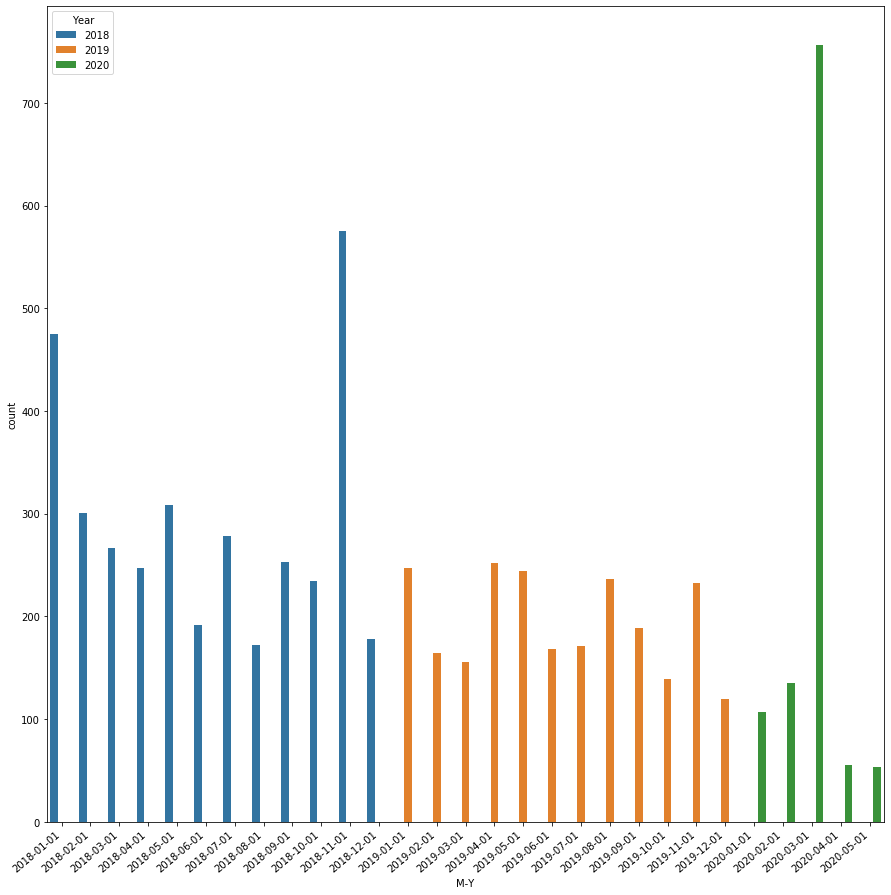

In [121]:
# Plot the responses for different events and regions
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax = sns.countplot(x='M-Y', data=venues_df.sort_values(by="M-Y"), hue = 'Year') 

Let's now get some stats for our different years, quarters, etc

In [53]:
venues_df['M_Y']

0       2027
1       2025
2       2022
3       2026
4       2030
        ... 
6900    2025
6901    2025
6902    2025
6903    2025
6904    2025
Name: M_Y, Length: 6905, dtype: int64

In [122]:
# Need to convert to geopandas df
gdf = geopandas.GeoDataFrame(venues_df, geometry=geopandas.points_from_xy(venues_df.Long, venues_df.Lat))
print(gdf.head())

Unnamed: 0        Lat       Long Venue_Type  \
0           0  10.377644 -75.496582       food   
1           1  40.647499  22.920163    default   
2           2  42.000524  12.564636       food   
3           3 -23.558042 -46.660100   shopping   
4           4  45.539970  13.734852   shopping   

                                     Venue_Name  Created_On_Epoch Created_On  \
0                                 QUESOS NENECO        1564682328 2019-08-01   
1  Ταπετσαρίες αυτοκινήτων - ΚΑΡΑΜΠΕΡΗΣ ΧΡΗΣΤΟΣ        1530718484 2018-07-04   
2                    AZIENDA AGRICOLA FORTUNATO        1551976752 2019-03-07   
3                                      KriptoBR        1534775809 2018-08-20   
4                            Buzz, Planet Koper        1574094032 2019-11-18   

     Quarter  Year  Month  ... Country         City Continent_Name  \
0  Quarter 3  2019      8  ...      CO    Cartagena  South America   
1  Quarter 3  2018      7  ...      GR  Ampelokipoi         Europe   
2  Quarter 

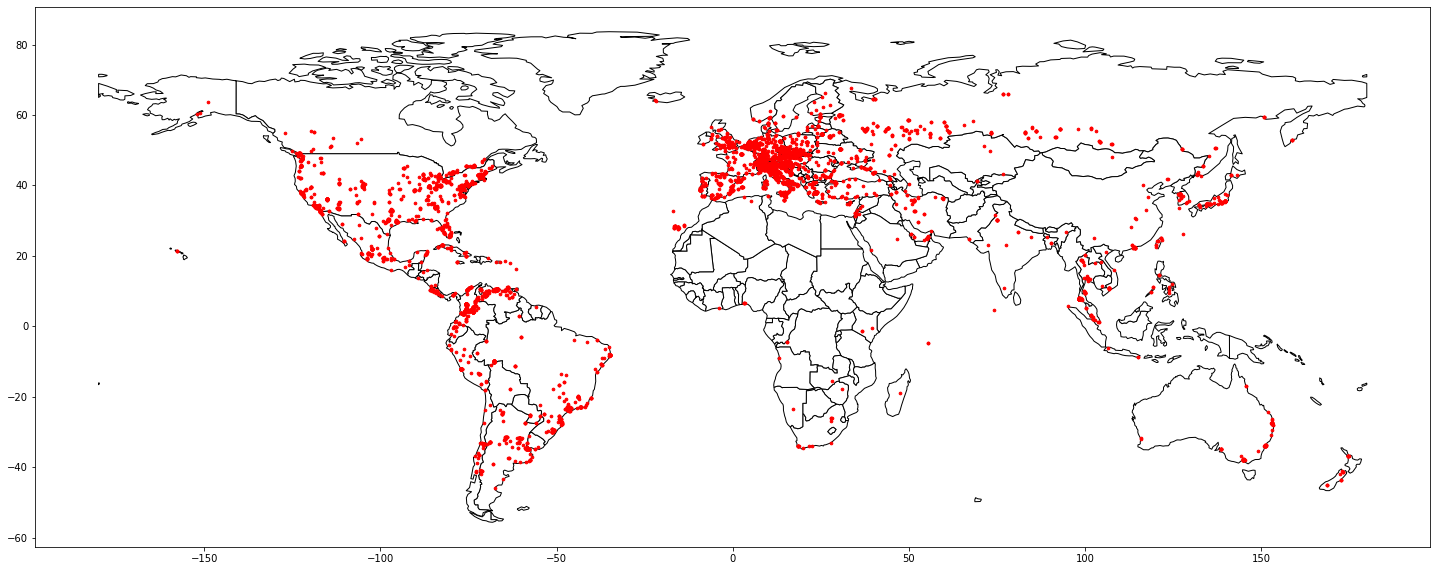

In [123]:
# Let's get a look at the world!

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent != 'Antarctica'].plot(
    color='white', edgecolor='black', figsize = (25,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', markersize = 7)

plt.show()

This is really neat and everything, but let's sum the number of new vendors in each country and look at that

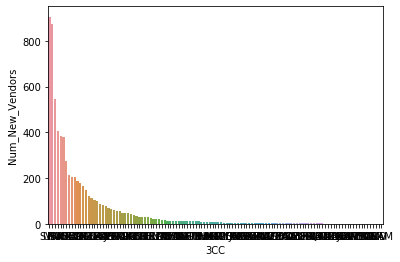

In [124]:
# get the values of each country(code)
cc_srs = venues_df['Three_Letter_Country_Code'].value_counts()
cc_df = cc_srs.to_frame().reset_index()
cc_df.columns = ['3CC','Num_New_Vendors']

sns.barplot(data = cc_df, x = '3CC', y = 'Num_New_Vendors')

The distribution is quite long tailed, let's try to plot it anyway. My hunch is that those two countries with a lot of new vendors will drown out, visually speaking, the representation of the others...

In [125]:
# Convert value counts series to geopandas
cc_gdf = geopandas.GeoDataFrame(cc_df)

# Get world dataset and add above data to it
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()
world = world.merge(cc_gdf, left_on = 'iso_a3', right_on = '3CC', how='left')
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  3CC  Num_New_Vendors  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  NaN              NaN  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  NaN              NaN  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  NaN              NaN  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  CAN             88.0  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  USA            874.0  
..                                                 ...  ...              ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  SRB              4.0  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  MNE              2.0  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  NaN              NaN  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  TTO              2.0  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  NaN              NaN  

[177 rows x 8 columns]

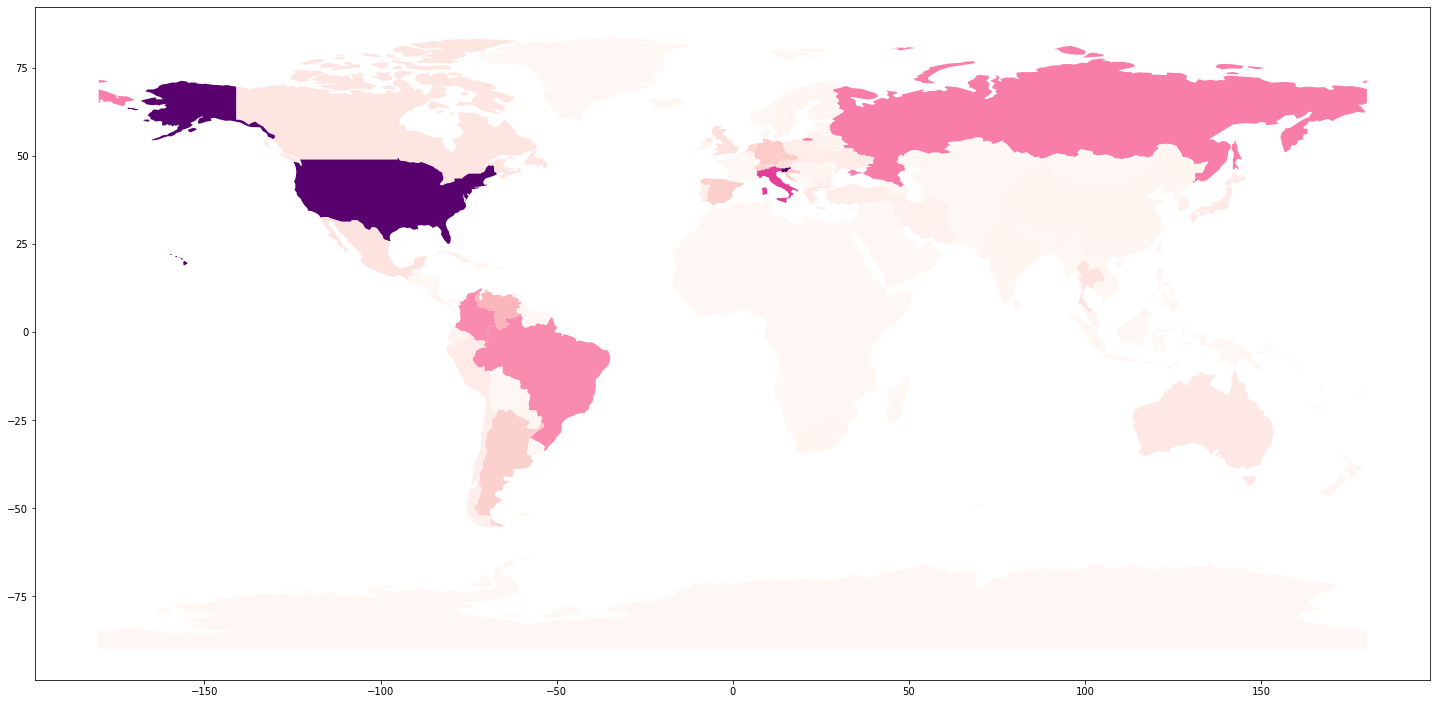

In [126]:
world.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

Not very visible, so let's do a log trick to fix this

In [127]:
world['Num_New_Vendors'] = np.log(world['Num_New_Vendors'])


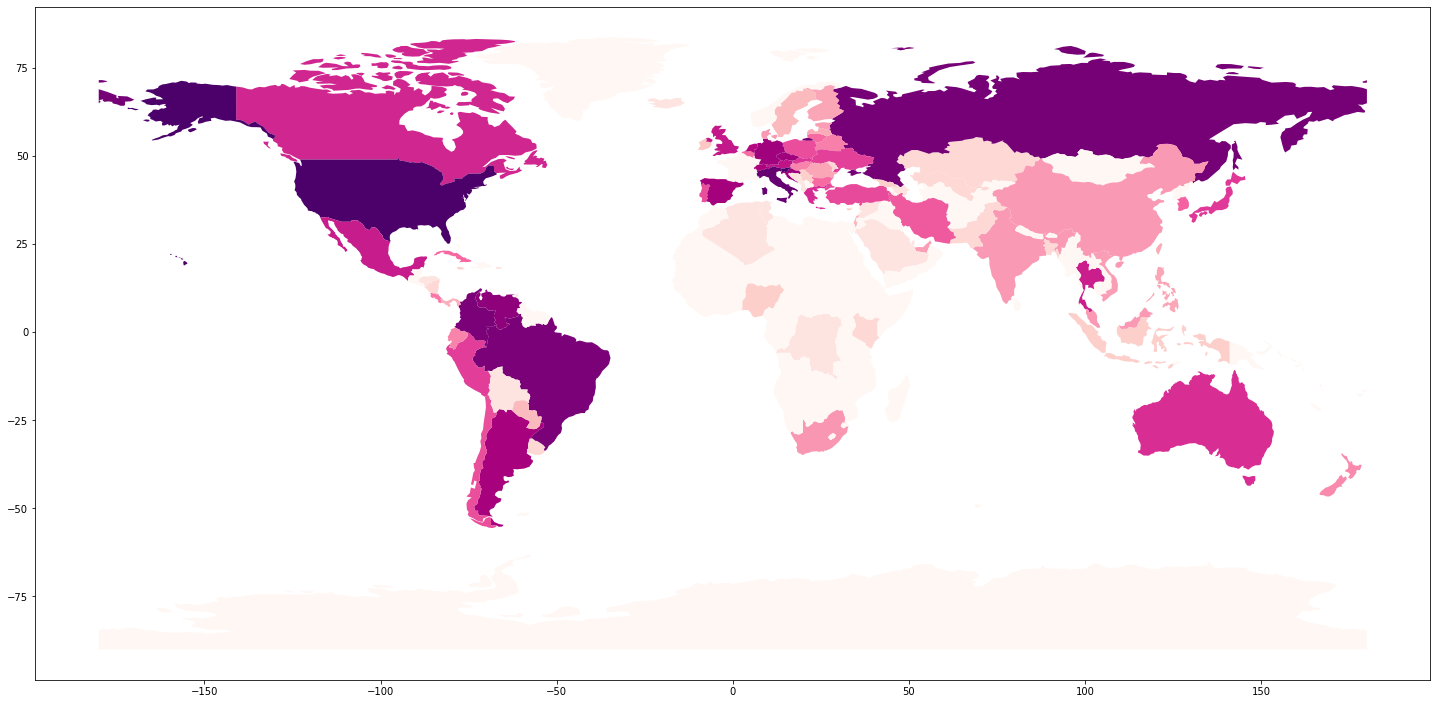

In [128]:
world.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

Ahh, that's much better! :) Now let's plot our original points on top of this map?

In [130]:
base = world.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=base, color='lightgreen', markersize = 3)

Let's get a detailed view of Europe

In [131]:
eur_countries = world[world.continent == 'Europe'][world.name != 'Russia']
eur_countries

eur_gdf = gdf[gdf.Continent_Name == 'Europe'][gdf.Country_Name != 'Russian Federation']
eur_gdf['Country_Name'].value_counts()


Slovenia, Republic of                                 906
Italy, Italian Republic                               544
Croatia, Republic of                                  214
Germany, Federal Republic of                          206
Czech Republic                                        206
Spain, Kingdom of                                     187
Switzerland, Swiss Confederation                      166
Netherlands, Kingdom of the                           146
Austria, Republic of                                  122
United Kingdom of Great Britain & Northern Ireland    112
Greece, Hellenic Republic                              82
Slovakia (Slovak Republic)                             69
France, French Republic                                58
Ukraine                                                57
Turkey, Republic of                                    49
Poland, Republic of                                    47
Portugal, Portuguese Republic                          45
Lithuania, Rep

In [132]:
world[world.continent == 'Europe']

pop_est continent              name iso_a3  gdp_md_est  \
18   142257519    Europe            Russia    RUS   3745000.0   
21     5320045    Europe            Norway    -99    364700.0   
43    67106161    Europe            France    -99   2699000.0   
110    9960487    Europe            Sweden    SWE    498100.0   
111    9549747    Europe           Belarus    BLR    165400.0   
112   44033874    Europe           Ukraine    UKR    352600.0   
113   38476269    Europe            Poland    POL   1052000.0   
114    8754413    Europe           Austria    AUT    416600.0   
115    9850845    Europe           Hungary    HUN    267600.0   
116    3474121    Europe           Moldova    MDA     18540.0   
117   21529967    Europe           Romania    ROU    441000.0   
118    2823859    Europe         Lithuania    LTU     85620.0   
119    1944643    Europe            Latvia    LVA     50650.0   
120    1251581    Europe           Estonia    EST     38700.0   
121   80594017    Europe           Germany    DEU   3979000.0   
122    7101510    Europe          Bulgaria    BGR    143100.0   
123   10768477    Europe            Greece    GRC    290500.0   
125    3047987    Europe           Albania    ALB     33900.0   
126    4292095    Europe           Croatia    HRV     94240.0   
127    8236303    Europe       Switzerland    CHE    496300.0   
128     594130    Europe        Luxembourg    LUX     58740.0   
129   11491346    Europe           Belgium    BEL    508600.0   
130   17084719    Europe       Netherlands    NLD    870800.0   
131   10839514    Europe          Portugal    PRT    297100.0   
132   48958159    Europe             Spain    ESP   1690000.0   
133    5011102    Europe           Ireland    IRL    322000.0   
141   62137802    Europe             Italy    ITA   2221000.0   
142    5605948    Europe           Denmark    DNK    264800.0   
143   64769452    Europe    United Kingdom    GBR   2788000.0   
144     339747    Europe           Iceland    ISL     16150.0   
150    1972126    Europe          Slovenia    SVN     68350.0   
151    5491218    Europe           Finland    FIN    224137.0   
152    5445829    Europe          Slovakia    SVK    168800.0   
153   10674723    Europe           Czechia    CZE    350900.0   
170    3856181    Europe  Bosnia and Herz.    BIH     42530.0   
171    2103721    Europe         Macedonia    MKD     29520.0   
172    7111024    Europe            Serbia    SRB    101800.0   
173     642550    Europe        Montenegro    MNE     10610.0   
174    1895250    Europe            Kosovo    -99     18490.0   

                                              geometry  3CC  Num_New_Vendors  
18   MULTIPOLYGON (((178.725 71.099, 180.000 71.516...  RUS         6.011267  
21   MULTIPOLYGON (((15.143 79.674, 15.523 80.016, ...  NaN              NaN  
43   MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...  NaN              NaN  
110  POLYGON ((11.027 58.856, 11.468 59.432, 12.300...  SWE         1.945910  
111  POLYGON ((28.177 56.169, 29.230 55.918, 29.372...  BLR         3.044522  
112  POLYGON ((31.786 52.102, 32.159 52.061, 32.412...  UKR         4.043051  
113  POLYGON ((23.484 53.912, 23.528 53.470, 23.805...  POL         3.850148  
114  POLYGON ((16.980 48.123, 16.904 47.715, 16.341...  AUT         4.804021  
115  POLYGON ((22.086 48.422, 22.641 48.150, 22.711...  HUN         2.995732  
116  POLYGON ((26.619 48.221, 26.858 48.368, 27.523...  MDA         1.098612  
117  POLYGON ((28.234 45.488, 28.680 45.304, 29.150...  ROU         2.397895  
118  POLYGON ((26.494 55.615, 26.588 55.167, 25.768...  LTU         3.401197  
119  POLYGON ((27.288 57.475, 27.770 57.244, 27.855...  LVA         2.302585  
120  POLYGON ((27.981 59.475, 27.981 59.475, 28.132...  EST         2.564949  
121  POLYGON ((14.120 53.757, 14.353 53.248, 14.075...  DEU         5.327876  
122  POLYGON ((22.657 44.235, 22.945 43.824, 23.332...  BGR         3.367296  
123  MULTIPOLYGON (((26.290 35.300, 26.165 35.005, ...  GRC    

In [133]:
dir(eur_countries[eur_countries['name'] == 'France'].geometry)
eur_countries[eur_countries['name'] == 'France'].geometry

43    MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...
Name: geometry, dtype: geometry

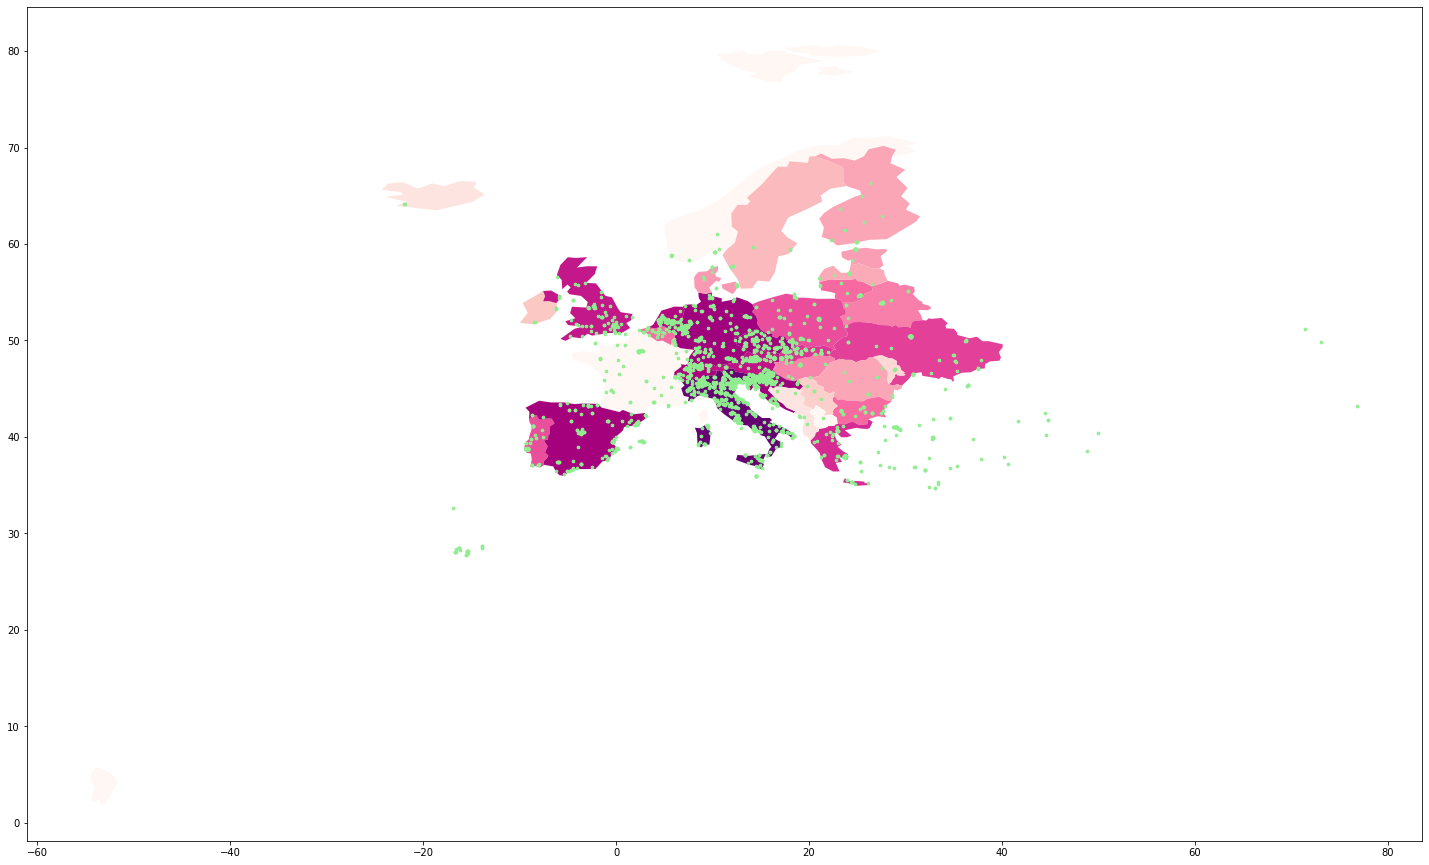

In [134]:
base = eur_countries.plot(column = 'Num_New_Vendors', cmap='RdPu', figsize = (25,25))

# We can now plot our ``GeoDataFrame``.
eur_gdf.plot(ax=base, color='lightgreen', markersize = 7)